In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)

In [2]:
df1 = pd.read_csv("BangaloreHousePrice.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


Dataset downloadded from:  https://www.kaggle.com/amitabhajoy/bengaluru-house-price-data

# Data Cleaning

In [3]:
df1.shape

(12216, 9)

In [4]:
df1.groupby('area_type')['area_type'].agg('count') # Examining area type feature

area_type
Built-up  Area          2234
Carpet  Area              78
Plot  Area              1867
Super built-up  Area    8037
Name: area_type, dtype: int64

In [5]:
df1['area_type'].value_counts() # same as above

Super built-up  Area    8037
Built-up  Area          2234
Plot  Area              1867
Carpet  Area              78
Name: area_type, dtype: int64

In [6]:
 df1['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [7]:
df1.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [8]:
df2 = df1.drop(['area_type','society','balcony','availability'],axis='columns')
df2.shape    # Dropping features that are not required

(12216, 5)

In [9]:
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


### Handling Na Values

In [10]:
df2.isnull().sum()

location       2
size          17
total_sqft     1
bath          71
price          1
dtype: int64

In [11]:
df3 = df2.dropna()   # since na values are minimal compare to dataset, we can drop
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [12]:
df3.shape

(12144, 5)

### Feature Engineering

In [13]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [14]:
## Adding new feature(integer) for bhk (Bedrooms Hall Kitchen)

df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))  # splitting based on space and taking first token which is number
df3.bhk.unique()

c:\users\shaon\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [15]:
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [16]:
df3=df3.drop(['size'], axis='columns')

In [17]:
df3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

We got some outlier like 43 bedroom. Let's explore it

In [18]:
df3[df3['bhk']>20]  # How many appartment has more than 20 bedroom

,location,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,8000,27.0,230.0,27
4684,Munnekollal,2400,40.0,660.0,43


2400 sqft and 43 bedroom! I am gonna fix this little later. We will fix this using total_sqft variable

In [19]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1783 - 1878', '120Sq. Yards', '3729'],
      dtype=object)

Opps! we have some square fit values as range(1783 - 1878), some have strings in values. Let me fix this first

In [20]:
def is_float(x):   # custom function for converting as float, whether not possible it will return false
    try:
        float(x)
    except:
        return False
    return True

In [21]:
df3[~df3['total_sqft'].apply(is_float)].head(10) # applying is_float() function
                                                 # ~ negate operation to show whether apply function return False
                                                 # showing sample of 10 values

,location,total_sqft,bath,price,bhk
30,Yelahanka,2100 - 2850,4.0,186.000,4
122,Hebbal,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,1042 - 1105,2.0,54.005,2
165,Sarjapur,1145 - 1340,2.0,43.490,2
188,KR Puram,1015 - 1540,2.0,56.800,2
410,Kengeri,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,1195 - 1440,2.0,63.770,2
648,Arekere,4125Perch,9.0,265.000,9
661,Yelahanka,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,3090 - 5002,4.0,445.000,4


We have not uniformed data here. Some ranges, some contain strings.
**Typically, dataset can contain unstructured, outliears, not uniformed, data error problem**
I am gonna average of range and skip all values which contain strings

In [22]:
def convert_sqft_to_num(x):
    try:
        tokens = x.split('-')
        if len(tokens) == 2:
            return (float(tokens[0])+float(tokens[1]))/2   # mean value of range
        if float(x):
            return float(x)       # Trying to convert as float if possible
    except:
        return None

In [23]:
convert_sqft_to_num('1400-700')

1050.0

In [24]:
convert_sqft_to_num('1400rs')

In [25]:
convert_sqft_to_num('1400')

1400.0

In [26]:
df3['total_sqft'] = df3['total_sqft'].apply(convert_sqft_to_num)  # Apply function take lambda function & native python function
df3.head(2)

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4


In [27]:
df3.loc[30]    # Checking how does perform apply function

location      Yelahanka
total_sqft         2475
bath                  4
price               186
bhk                   4
Name: 30, dtype: object

In [28]:
df3.loc[410]

location      Kengeri
total_sqft        NaN
bath                1
price            18.5
bhk                 1
Name: 410, dtype: object

In [29]:
df3['total_sqft'].isnull().sum() #  We got some na values for string inputs

43

In [30]:
df3=df3.dropna()

In [31]:
df3['total_sqft'].isnull().sum()

0

In [32]:
df3.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2


# Feature Engineering ( Exploring new features)

In [33]:
df4=df3.copy()

df4['price_per_sqft'] = df4['price']*100000/df4['total_sqft']
df4.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


In [34]:
df4_stats = df4['price_per_sqft'].describe()
df4_stats

count    1.210100e+04
mean     8.018258e+03
std      1.114583e+05
min      2.678298e+02
25%      4.266667e+03
50%      5.444646e+03
75%      7.317073e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

In [35]:
df3['location'].unique() # observing location column

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       'basaveshwarnagar', 'Banashankari 3rd stage, Vivekanandanagar',
       'Annaiah Reddy Layout'], dtype=object)

In [36]:
len(df3['location'].unique())  

1262

So, there are 1262 unique location. We can not convert this into dummy columns or one hot encoding. Because it will make almost  1262 new columns. THis is called high dimensionality problem. 
1. We have to reduce dimension 
2. We can remove other fetures which has only 1-2 minimal data point

# Dimensionality Reduction

In [37]:
df4.location = df4['location'].apply(lambda x: x.strip())  # removing extra space from location column

In [38]:
location_stats = df4['location'].value_counts(ascending=False)
location_stats

Whitefield              482
Sarjapur  Road          347
Electronic City         280
Kanakpura Road          246
Thanisandra             225
                       ... 
Chowdeshwari Layout       1
Billapura                 1
Kanakapura Main Road      1
Hanumagiri                1
Cubbon Road               1
Name: location, Length: 1252, dtype: int64

In [39]:
len(location_stats[location_stats>10])     # Exploring how many have location have greater than 10 times

228

In [40]:
len(location_stats[location_stats<10])    # location that have less than 10 times

1010

In [41]:
df4.shape                  # So, we have 1010 rows with other or minimal times location, out of 12101
                           # We, can put them into new row named 'others'

(12101, 6)

In [42]:
# Any location having less than 10 data points should be tagged as "other" location.

location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

Shivaji Nagar           10
Naganathapura           10
Marsur                  10
Nagasandra              10
Bharathi Nagar          10
                        ..
Chowdeshwari Layout      1
Billapura                1
Kanakapura Main Road     1
Hanumagiri               1
Cubbon Road              1
Name: location, Length: 1024, dtype: int64

In [43]:
len(df4.location.unique())

1252

In [44]:
df4['location'] = df4['location'].apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
# Creating other rows with all those minimal values

In [45]:
len(df4.location.unique())  # let's see how many dimension now we have in the location column

229

In [46]:
df4.head(10)

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,1310.0,3.0,63.25,3,4828.244275
9,other,1020.0,6.0,370.00,6,36274.509804


# Outlier Removal
**Normally square ft per bedroom is 300 (i.e. 2 bhk apartment is minimum 600 sqft. If you have for example 400 sqft apartment with 2 bhk than that seems suspicious and can be removed as an outlier. We will remove such outliers by keeping our minimum thresold per bhk to be 300 sqft).  We may need help of business manager for these information**

In [47]:
df4[df4.total_sqft/df4.bhk<300].head()   # these are data error/outlier

,location,total_sqft,bath,price,bhk,price_per_sqft
9,other,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,1350.0,7.0,85.0,8,6296.296296
70,other,500.0,3.0,100.0,3,20000.000000


In [48]:
df4.shape

(12101, 6)

In [49]:
df5 = df4[~(df4.total_sqft/df4.bhk<300)]   # Removing outlier with the help of negate function
df5.shape

(11427, 6)

### Using Standar Deviation

In [50]:
df5.price_per_sqft.describe()   # our min and max value representing outlier

count     11427.000000
mean       6295.877448
std        4127.347358
min         267.829813
25%        4207.520267
50%        5299.684543
75%        6918.319452
max      176470.588235
Name: price_per_sqft, dtype: float64

Here we find that min price per sqft is 267 rs/sqft whereas max is 12000000, this shows a wide variation in property prices. We should remove these extreme cases/outliers per location using mean and one standard deviation

We are assuming our dataset as **normal distribution**. Then most of the data point(around 68%) should lie between mean and standard deviation.

In [51]:
def remove_pps_outliers(df):    # determining mean & std *per location*
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
                                 # mean-std> "data" <mean+std
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

In [52]:
df5.shape

(11427, 6)

In [53]:
df6 = remove_pps_outliers(df5)   # removing outlier from df5
df6.shape

(9375, 6)

**Let's check if for a given location how does the 2 BHK and 3 BHK property prices look like**

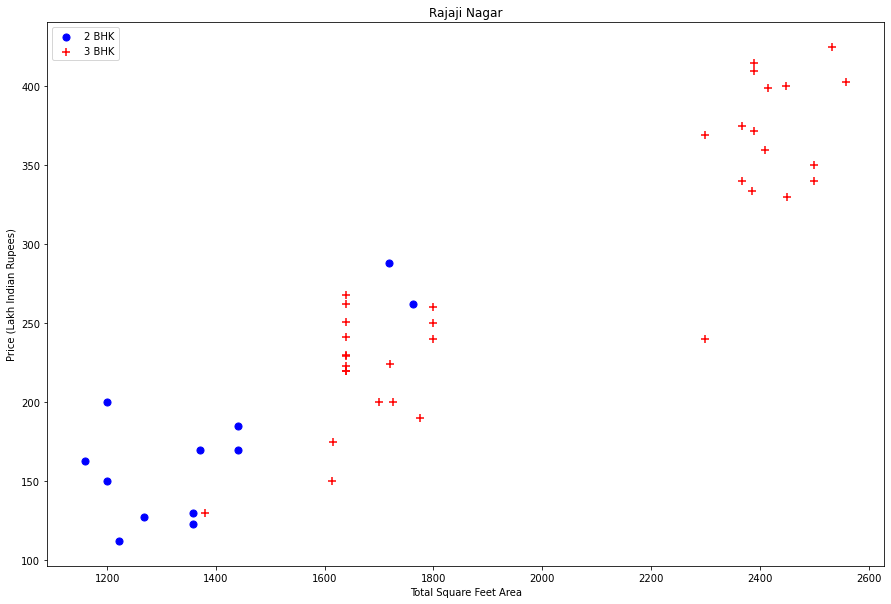

In [54]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)] # selecting 2 bhk for a certain location
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='red',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df6,"Rajaji Nagar")

There are some points where the price of 2 bedroom apartment is higher than 3 bedroom apartment

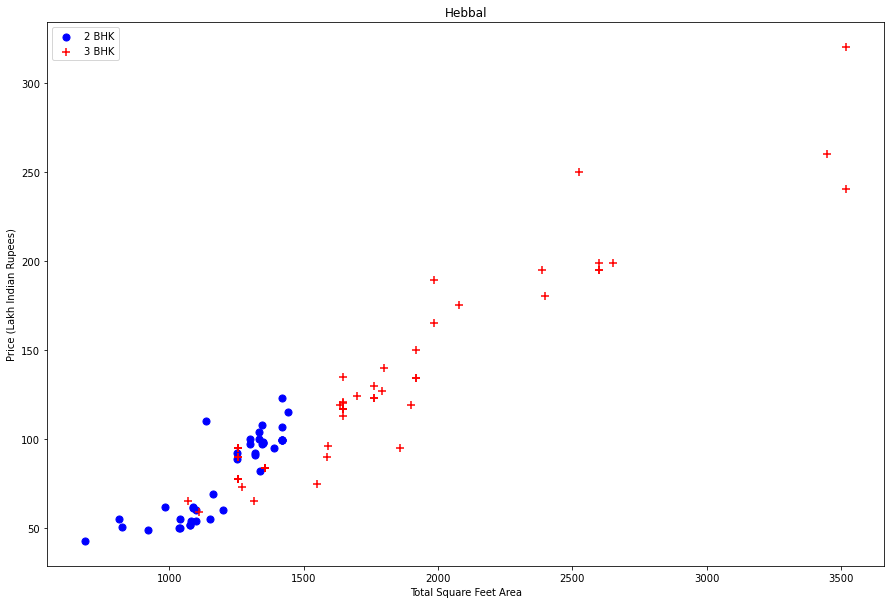

In [55]:
plot_scatter_chart(df6,"Hebbal") # trying to explore another location

We should also remove properties where for same location, the price of (for example) 3 bedroom apartment is less than 2 bedroom apartment (with same square ft area). What we will do is for a given location, we will build a dictionary of stats per bhk, i.e.

`{
    '1' : {
        'mean': 4000,
        'std: 2000,
        'count': 34
    },
    '2' : {
        'mean': 4300,
        'std: 2300,
        'count': 22
    },    
}`

Now we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment

In [56]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):   # Loop through group by location
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):     # loop through group by bhk on certain location
            bhk_stats[bhk] = {                             # Creating dictionary based on bhk number
                'mean': np.mean(bhk_df.price_per_sqft),    # These are values(mean,std,count) of dictionary
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)                   # getting value of bhk-1 dictionary
            if stats and stats['count']>5:                 # If count of stats>5
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')           #Exclude indecies contain price_per_sqft<stats['mean'] index

In [57]:
df7 = remove_bhk_outliers(df6)
df7.shape

(6655, 6)

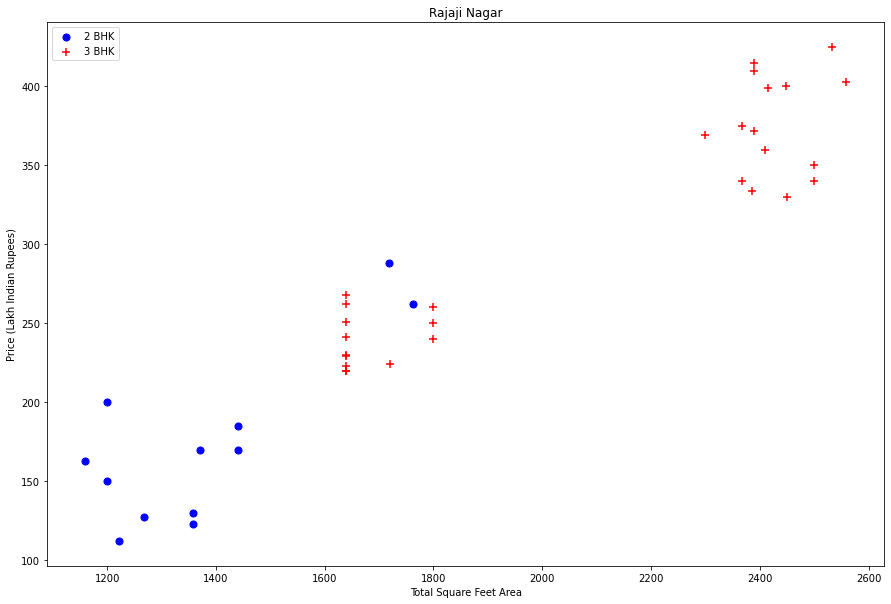

In [58]:
plot_scatter_chart(df7,"Rajaji Nagar") #Plotting same scatter chart again to visualize price_per_sqft for 2 BHK and 3 BHK properties

Let's see before and after outlier removal

<img src='rajaji_nagar_outliers.png' height=500 width=700>
<img src='hebbal_outliers.png' height=500 width=700>

Text(0, 0.5, 'Count')

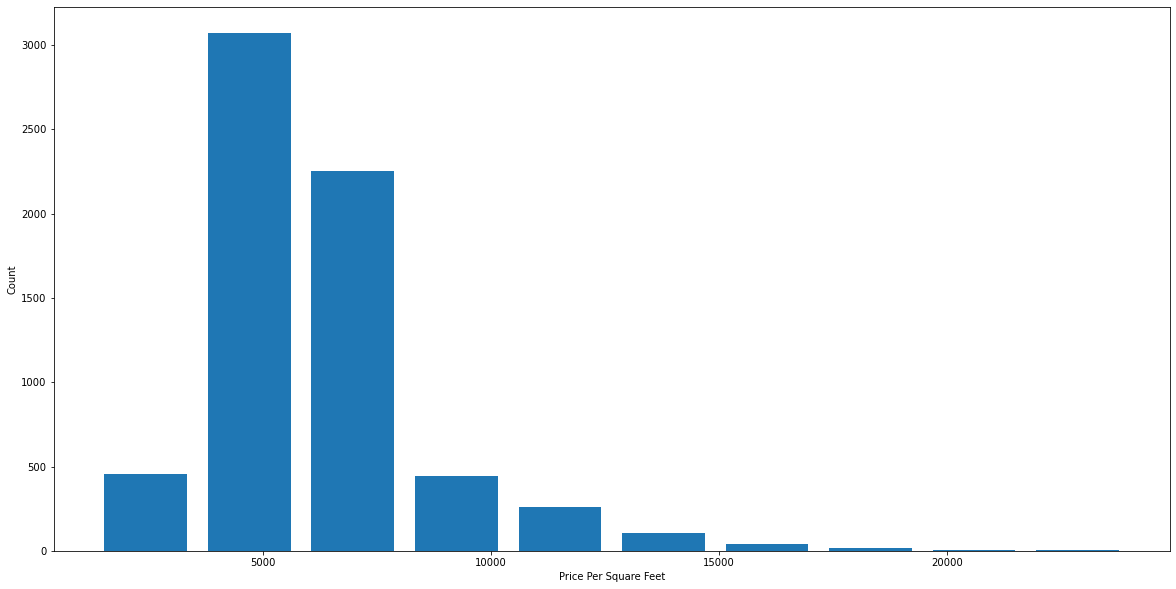

In [59]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df7.price_per_sqft,rwidth=0.8) # histogram for how many apartment per squar feet area
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

    So, from 0-10,000 we have majority of data points which is normal distribution (bell curve)

### Outlier removal using bathroom features

In [60]:
df7.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

Opps! 13 bathroom in an apartment looks like unusual

In [61]:
df7[df7.bath>10]  # Checking which have more than 10 bathroom

,location,total_sqft,bath,price,bhk,price_per_sqft
4767,Neeladri Nagar,4000.0,12.0,160.0,10,4000.000000
7736,other,12000.0,12.0,525.0,10,4375.000000
7832,other,10000.0,16.0,550.0,16,5500.000000
8590,other,6000.0,12.0,150.0,11,2500.000000
8936,other,5425.0,13.0,275.0,13,5069.124424


Where number of bathroom are greater than number of bhk(hall room)+2 are outliers

Text(0, 0.5, 'Count')

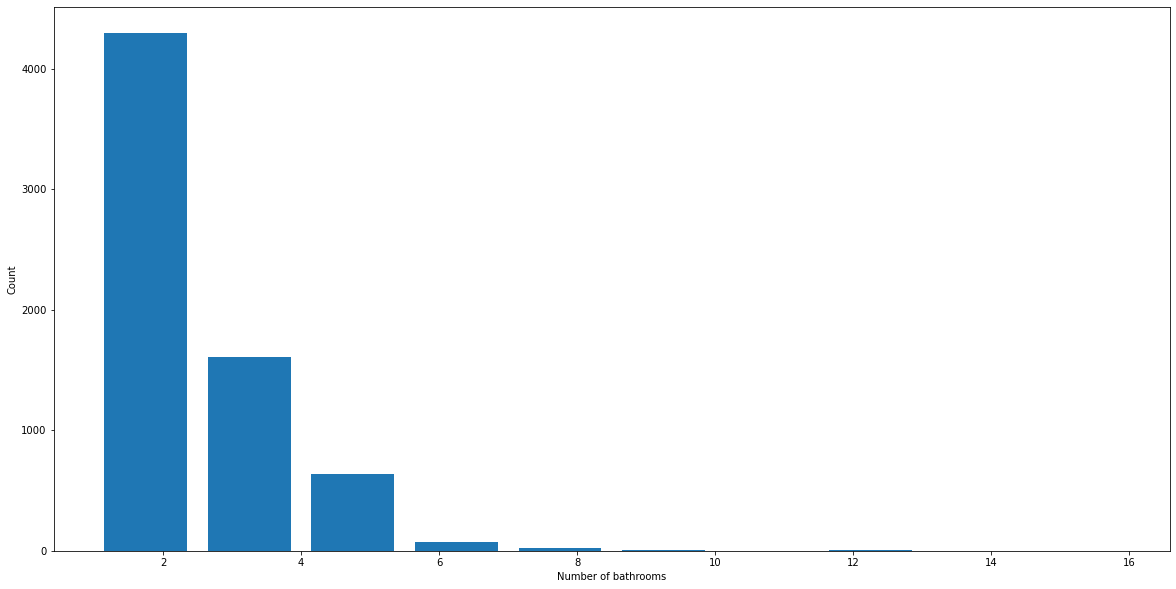

In [62]:
plt.hist(df7.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [63]:
df7[df7.bath>df7.bhk+2]

,location,total_sqft,bath,price,bhk,price_per_sqft
1469,Chikkabanavar,2460.0,7.0,80.0,4,3252.032520
6064,Thanisandra,1806.0,6.0,116.0,3,6423.034330
7652,other,11338.0,9.0,1000.0,6,8819.897689
9206,other,7000.0,8.0,450.0,4,6428.571429


In [64]:
df7 = df7[df7.bath<df7.bhk+2]   # Removing those outliers
df7.shape

(6583, 6)

In [65]:
df7 = df7.drop(['price_per_sqft'],axis='columns') # price_per_sqft can be dropped. It was used for outlier detection
df7.head(4)

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3


So, our dataset is now clean

# One Hot Coding or Dummies

In [68]:
dummies = pd.get_dummies(df7.location)
dummies.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [69]:
df7 = pd.concat([df7,dummies.drop('other',axis='columns')],axis='columns')
df7.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
df7 = df7.drop('location',axis='columns')
df7.head(2)

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [71]:
df7.shape

(6583, 232)

# Buildig Model

In [72]:
X=df7.drop(['price'],axis='columns')
X.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [73]:
y=df7['price']

In [74]:
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [75]:
X.shape[0]==len(y)

True

In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [79]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.851625504686109